In [1]:
!unzip -qq DCdataset.zip

In [2]:
import os, shutil, pathlib

original_dir = pathlib.Path("./DCdataset/train/")
new_base_dir = pathlib.Path("./cats_vs_dogs_2000")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=2000)
make_subset("validation", start_index=2000, end_index=2500)
make_subset("test", start_index=2500, end_index=3000)

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [5]:
model.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [6]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 4000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [7]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [8]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [9]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [10]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


In [11]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [12]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
125/125 [==============================] - 19s 57ms/step - loss: 0.6890 - accuracy: 0.5337 - val_loss: 0.6615 - val_accuracy: 0.6000
Epoch 2/30
125/125 [==============================] - 8s 61ms/step - loss: 0.6442 - accuracy: 0.6285 - val_loss: 0.6386 - val_accuracy: 0.6330
Epoch 3/30
125/125 [==============================] - 8s 64ms/step - loss: 0.6156 - accuracy: 0.6532 - val_loss: 0.6363 - val_accuracy: 0.6290
Epoch 4/30
125/125 [==============================] - 7s 52ms/step - loss: 0.5724 - accuracy: 0.6942 - val_loss: 0.5498 - val_accuracy: 0.7310
Epoch 5/30
125/125 [==============================] - 8s 63ms/step - loss: 0.5304 - accuracy: 0.7333 - val_loss: 0.5332 - val_accuracy: 0.7370
Epoch 6/30
125/125 [==============================] - 8s 64ms/step - loss: 0.4788 - accuracy: 0.7690 - val_loss: 0.4832 - val_accuracy: 0.7710
Epoch 7/30
125/125 [==============================] - 7s 52ms/step - loss: 0.4493 - accuracy: 0.7903 - val_loss: 0.5797 - val_accuracy: 0.718

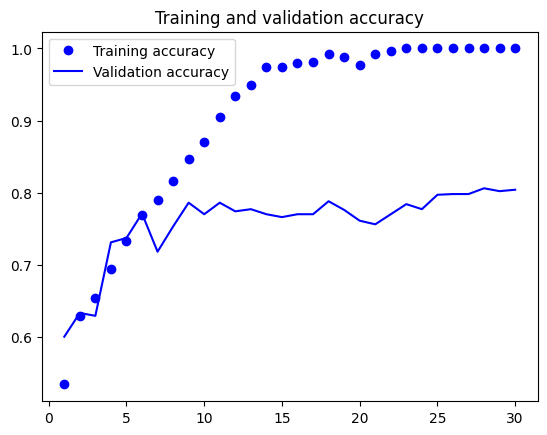

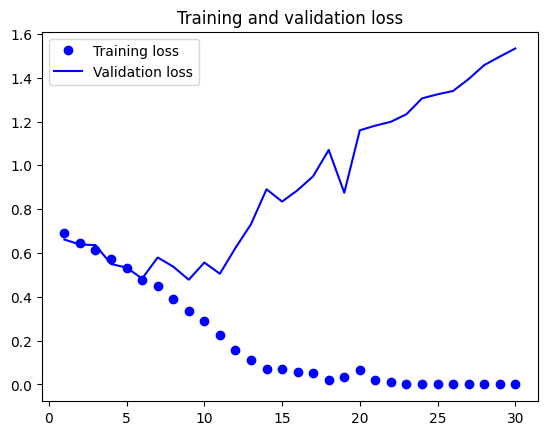

In [13]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [14]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 31ms/step - loss: 0.5924 - accuracy: 0.7470
Test accuracy: 0.747


In [15]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

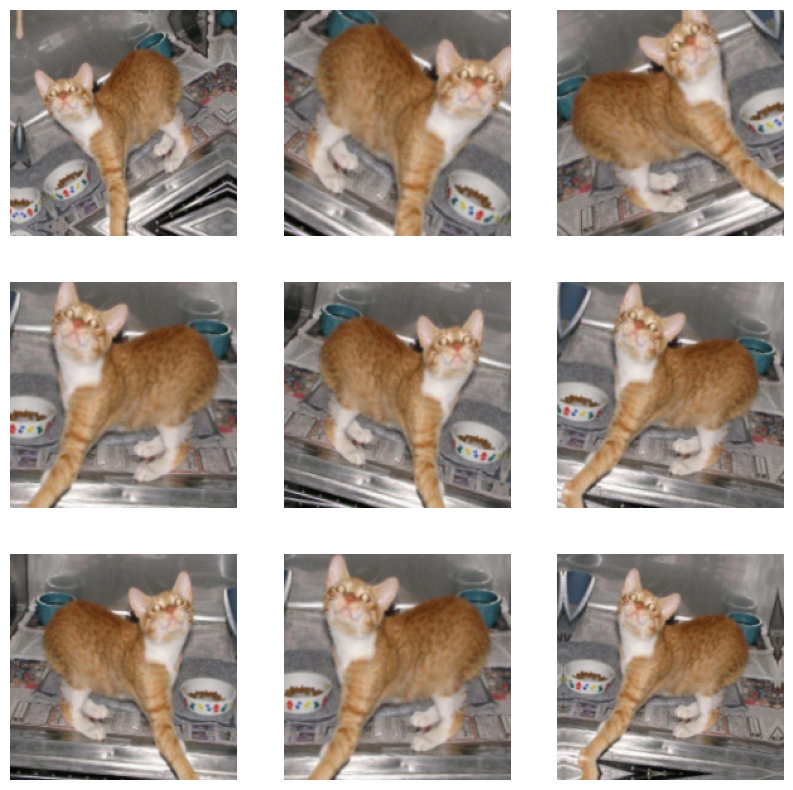

In [16]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [17]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [18]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
125/125 [==============================] - 11s 59ms/step - loss: 0.6942 - accuracy: 0.5310 - val_loss: 0.6885 - val_accuracy: 0.5420
Epoch 2/100
125/125 [==============================] - 8s 64ms/step - loss: 0.6876 - accuracy: 0.5335 - val_loss: 0.6636 - val_accuracy: 0.6090
Epoch 3/100
125/125 [==============================] - 8s 60ms/step - loss: 0.6722 - accuracy: 0.5773 - val_loss: 0.7281 - val_accuracy: 0.5450
Epoch 4/100
125/125 [==============================] - 7s 56ms/step - loss: 0.6571 - accuracy: 0.6127 - val_loss: 0.6355 - val_accuracy: 0.6480
Epoch 5/100
125/125 [==============================] - 7s 55ms/step - loss: 0.6423 - accuracy: 0.6365 - val_loss: 0.6196 - val_accuracy: 0.6730
Epoch 6/100
125/125 [==============================] - 7s 56ms/step - loss: 0.6403 - accuracy: 0.6352 - val_loss: 0.6079 - val_accuracy: 0.6760
Epoch 7/100
125/125 [==============================] - 8s 65ms/step - loss: 0.6243 - accuracy: 0.6645 - val_loss: 0.6070 - val_accuracy

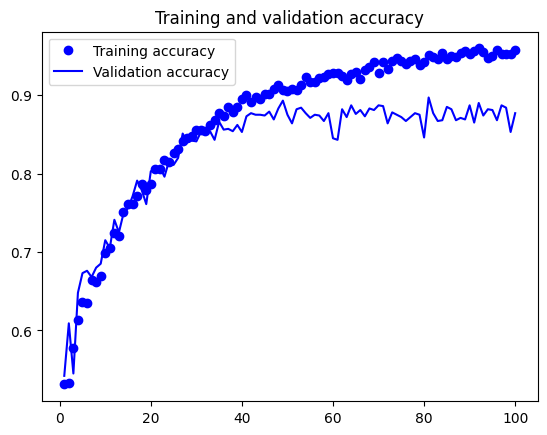

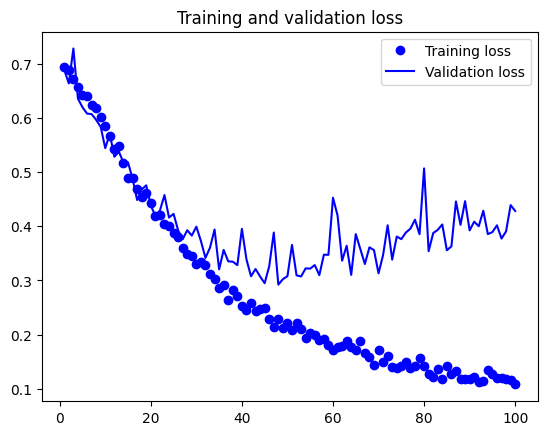

In [19]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [30]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 30ms/step - loss: 0.2985 - accuracy: 0.8820
Test accuracy: 0.882


In [34]:
conv_base = keras.applications.inception_v3.InceptionV3(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [35]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.inception_v3.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 39ms/step


In [36]:
train_features.shape

(4000, 4, 4, 2048)

In [37]:
inputs = keras.Input(shape=(4, 4, 2048))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
125/125 [==============================] - 2s 11ms/step - loss: 3.4008 - accuracy: 0.9592 - val_loss: 3.1063 - val_accuracy: 0.9650
Epoch 2/20
125/125 [==============================] - 1s 8ms/step - loss: 1.9088 - accuracy: 0.9827 - val_loss: 1.2568 - val_accuracy: 0.9870
Epoch 3/20
125/125 [==============================] - 1s 6ms/step - loss: 2.1853 - accuracy: 0.9780 - val_loss: 2.3983 - val_accuracy: 0.9800
Epoch 4/20
125/125 [==============================] - 1s 6ms/step - loss: 1.2682 - accuracy: 0.9868 - val_loss: 4.5505 - val_accuracy: 0.9760
Epoch 5/20
125/125 [==============================] - 1s 6ms/step - loss: 1.1798 - accuracy: 0.9890 - val_loss: 5.7684 - val_accuracy: 0.9710
Epoch 6/20
125/125 [==============================] - 1s 6ms/step - loss: 0.5789 - accuracy: 0.9942 - val_loss: 2.1001 - val_accuracy: 0.9810
Epoch 7/20
125/125 [==============================] - 1s 6ms/step - loss: 0.1918 - accuracy: 0.9970 - val_loss: 2.0549 - val_accuracy: 0.9840
Epoch

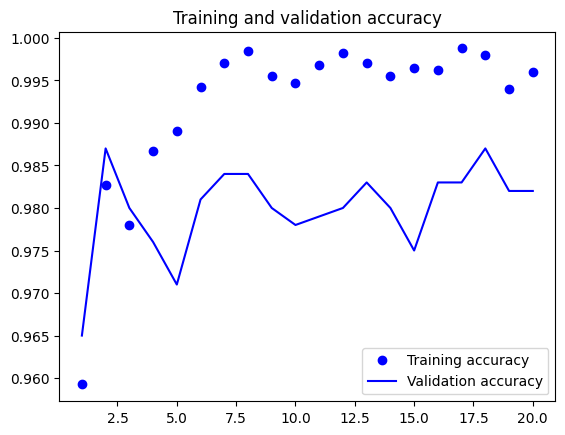

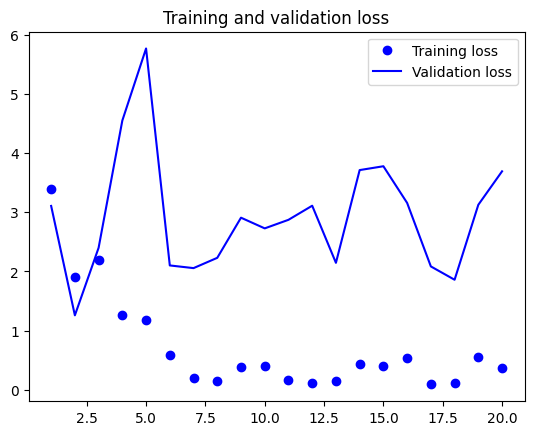

In [38]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [41]:
conv_base  = keras.applications.inception_v3.InceptionV3(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

In [42]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 188


In [43]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


In [44]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.inception_v3.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [45]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
125/125 [==============================] - 18s 99ms/step - loss: 4.8476 - accuracy: 0.9380 - val_loss: 2.3247 - val_accuracy: 0.9740
Epoch 2/50
125/125 [==============================] - 10s 79ms/step - loss: 5.3783 - accuracy: 0.9485 - val_loss: 2.7170 - val_accuracy: 0.9680
Epoch 3/50
125/125 [==============================] - 11s 83ms/step - loss: 3.6711 - accuracy: 0.9580 - val_loss: 1.0125 - val_accuracy: 0.9810
Epoch 4/50
125/125 [==============================] - 9s 68ms/step - loss: 3.0966 - accuracy: 0.9580 - val_loss: 1.7029 - val_accuracy: 0.9740
Epoch 5/50
125/125 [==============================] - 11s 85ms/step - loss: 2.2906 - accuracy: 0.9680 - val_loss: 1.2877 - val_accuracy: 0.9750
Epoch 6/50
125/125 [==============================] - 11s 84ms/step - loss: 1.8590 - accuracy: 0.9655 - val_loss: 0.9098 - val_accuracy: 0.9820
Epoch 7/50
125/125 [==============================] - 9s 68ms/step - loss: 1.5247 - accuracy: 0.9682 - val_loss: 1.3902 - val_accuracy: 0

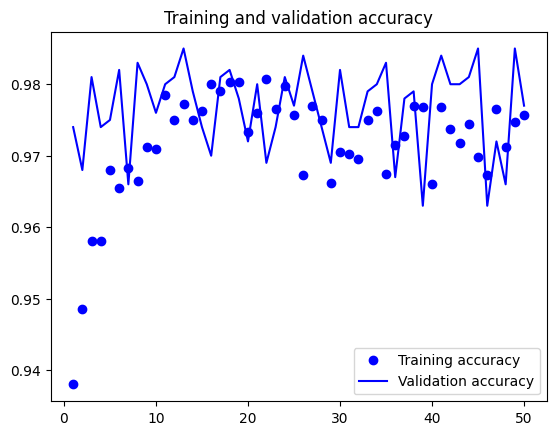

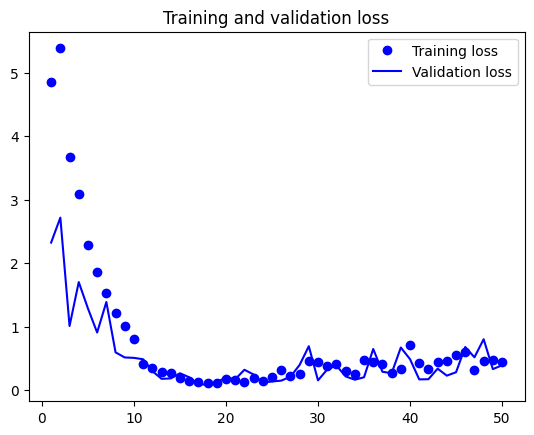

In [46]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [47]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 4s 54ms/step - loss: 0.1345 - accuracy: 0.9800
Test accuracy: 0.980


In [48]:
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d_480 (Conv2D)            (None, None, None,   864         ['input_9[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization_470 (Batch  (None, None, None,   96         ['conv2d_480[0][0]']             
 Normalization)                 32)                                                    

In [49]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [50]:
from keras.optimizers import Adam
optimizer = Adam(lr=0.001)
model.compile(loss="binary_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


125/125 [==============================] - 16s 86ms/step - loss: 0.5374 - accuracy: 0.9735 - val_loss: 0.3463 - val_accuracy: 0.9810
Epoch 2/30
125/125 [==============================] - 10s 78ms/step - loss: 0.5587 - accuracy: 0.9730 - val_loss: 0.3760 - val_accuracy: 0.9790
Epoch 3/30
125/125 [==============================] - 10s 77ms/step - loss: 0.4678 - accuracy: 0.9732 - val_loss: 0.5165 - val_accuracy: 0.9790
Epoch 4/30
125/125 [==============================] - 9s 68ms/step - loss: 0.3576 - accuracy: 0.9778 - val_loss: 0.3687 - val_accuracy: 0.9780
Epoch 5/30
125/125 [==============================] - 11s 81ms/step - loss: 0.5427 - accuracy: 0.9768 - val_loss: 0.3232 - val_accuracy: 0.9760
Epoch 6/30
125/125 [==============================] - 10s 81ms/step - loss: 0.3258 - accuracy: 0.9793 - val_loss: 0.4544 - val_accuracy: 0.9790
Epoch 7/30
125/125 [==============================] - 9s 68ms/step - loss: 0.5094 - accuracy: 0.9743 - val_loss: 0.3598 - val_accuracy: 0.9780
Epoch

In [51]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 50ms/step - loss: 0.4508 - accuracy: 0.9840
Test accuracy: 0.984
